## Imports

In [1]:
import pandas as pd 
import numpy as np 

from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')m

2023-07-25 21:25:17.023925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Loading CSV

In [3]:
music = pd.read_csv('/Users/kellyjara/Desktop/Project 5 (copy)/Data/music.csv')
music_df = pd.DataFrame(music)

In [4]:
music_df

,Unnamed: 0,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,0,pop_19.wav,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,1,pop_25.wav,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,2,pop_31.wav,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,3,pop.00027.wav,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,4,pop.00033.wav,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1512,disco.00062.wav,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,1513,disco.00089.wav,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,1514,disco.00088.wav,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,1515,disco.00063.wav,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


In [5]:
music_df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        1517 non-null   object 
 1   mfcc_mean        1517 non-null   float64
 2   mfcc_var         1517 non-null   float64
 3   mfcc_min         1517 non-null   float64
 4   mfcc_max         1517 non-null   float64
 5   mfcc1_mean       1517 non-null   float64
 6   mfcc1_var        1517 non-null   float64
 7   mfcc1_min        1517 non-null   float64
 8   mfcc1_max        1517 non-null   float64
 9   mfcc2_mean       1517 non-null   float64
 10  mfcc2_var        1517 non-null   float64
 11  mfcc2_min        1517 non-null   float64
 12  mfcc2_max        1517 non-null   float64
 13  delta_mean       1517 non-null   float64
 14  delta_var        1517 non-null   float64
 15  delta2_mean      1517 non-null   float64
 16  delta2_var       1517 non-null   float64
 17  harmonic_mean 

In [7]:
music_df['genre_x'].value_counts()

blues        206
pop          201
hiphop       201
rock         200
country      149
classical    137
jazz         123
metal        100
reggae       100
disco        100
Name: genre_x, dtype: int64

In [8]:
music_df['genre_y'].value_counts()

blues        206
pop          201
hiphop       201
rock         200
country      149
classical    137
jazz         123
metal        100
reggae       100
disco        100
Name: genre_y, dtype: int64

In [9]:
music_df.drop(columns = 'genre_x', inplace = True)

In [10]:
music_df

,file_name,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,pop_19.wav,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,pop_25.wav,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,pop_31.wav,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,pop.00027.wav,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,pop.00033.wav,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,disco.00062.wav,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,disco.00089.wav,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,disco.00088.wav,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,disco.00063.wav,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


In [11]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        1517 non-null   object 
 1   mfcc_mean        1517 non-null   float64
 2   mfcc_var         1517 non-null   float64
 3   mfcc_min         1517 non-null   float64
 4   mfcc_max         1517 non-null   float64
 5   mfcc1_mean       1517 non-null   float64
 6   mfcc1_var        1517 non-null   float64
 7   mfcc1_min        1517 non-null   float64
 8   mfcc1_max        1517 non-null   float64
 9   mfcc2_mean       1517 non-null   float64
 10  mfcc2_var        1517 non-null   float64
 11  mfcc2_min        1517 non-null   float64
 12  mfcc2_max        1517 non-null   float64
 13  delta_mean       1517 non-null   float64
 14  delta_var        1517 non-null   float64
 15  delta2_mean      1517 non-null   float64
 16  delta2_var       1517 non-null   float64
 17  harmonic_mean 

In [12]:
music_df2 = music_df.drop(columns = ['file_name'])

In [13]:
music_df2

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,tntz_min,tntz_max,melspec_mean,melspec_var,melspec_min,melspec_max,rms_mean,rms_var,tempo,genre_y
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,23.226763,25.148724,22.026917,16.932308,12.370562,8.246605,19.116907,11.814075,30.205139,pop
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,12.809576,15.228867,17.706797,21.371332,16.580214,12.868278,15.292180,53.268745,16.516775,pop
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,57.029930,33.422485,22.549700,19.325535,4.672528,16.462545,8.511788,15.057601,5.709808,pop
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,36.525730,20.675253,10.802331,14.559845,15.033474,5.253385,9.168291,4.383974,5.567156,pop
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,5.814939,4.739766,8.573198,7.718379,8.373836,5.137630,4.571923,2.318799,5.877789,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,17.894875,...,1.811980,4.863695,3.857496,4.530632,5.103957,2.381736,1.127911,1.859340,0.916801,disco
1513,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,17.097872,...,4.009619,4.307391,7.870385,8.390940,6.161437,2.004640,2.895298,3.721590,1.561397,disco
1514,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,2.948735,2.458494,2.252382,2.389016,3.919963,2.275582,2.969935,1.674802,1.885246,disco
1515,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,5.689360,7.742268,8.657559,7.667148,4.423709,4.082315,3.176005,2.357672,1.589757,disco


## OneHotEncoding Genres

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:
genres_df = music_df2[['genre_y']]

In [16]:
onehot_encode = OneHotEncoder(sparse = False)

genres_encoded = onehot_encode.fit_transform(genres_df)

encoded_df = pd.DataFrame(genres_encoded, columns = onehot_encode.get_feature_names_out(['genre_y']))

result_df = pd.concat([music_df2, encoded_df], axis = 1)

result_df.drop(columns = ['genre_y'], inplace = True)

In [17]:
result_df

,mfcc_mean,mfcc_var,mfcc_min,mfcc_max,mfcc1_mean,mfcc1_var,mfcc1_min,mfcc1_max,mfcc2_mean,mfcc2_var,...,genre_y_blues,genre_y_classical,genre_y_country,genre_y_disco,genre_y_hiphop,genre_y_jazz,genre_y_metal,genre_y_pop,genre_y_reggae,genre_y_rock
0,-8.942821,64.183520,-1.467964,23.011240,4.736657,6.307176,8.763370,8.697861,0.020061,8.945642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-45.097984,88.633490,8.985597,31.276129,6.828823,15.752106,0.584817,10.050541,0.788925,7.602591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-106.645210,65.831770,12.572899,30.452550,16.271381,3.800628,-1.045976,4.102991,-2.589358,1.586828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-75.366130,83.334880,10.703896,14.455102,14.244521,7.410257,5.279713,-0.400126,5.717757,3.361804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-69.001930,73.770000,-12.468982,9.536624,-0.045610,12.718271,3.165059,-0.084658,2.522358,2.874675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-107.867600,81.936584,-30.634070,41.331936,-8.509501,31.333730,-8.869069,26.030900,-8.280142,17.894875,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1513,-114.932045,113.463870,-29.804312,42.612103,-10.326010,26.973412,-14.493735,21.240532,-17.650540,17.097872,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1514,-97.885620,101.003600,-40.547610,51.050190,-11.709620,25.064747,-14.048207,17.197395,-9.623669,16.973530,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1515,-51.776085,70.331350,-3.911701,49.742280,1.587971,35.703487,-4.088695,24.787909,-9.707024,22.039282,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mfcc_mean          1517 non-null   float64
 1   mfcc_var           1517 non-null   float64
 2   mfcc_min           1517 non-null   float64
 3   mfcc_max           1517 non-null   float64
 4   mfcc1_mean         1517 non-null   float64
 5   mfcc1_var          1517 non-null   float64
 6   mfcc1_min          1517 non-null   float64
 7   mfcc1_max          1517 non-null   float64
 8   mfcc2_mean         1517 non-null   float64
 9   mfcc2_var          1517 non-null   float64
 10  mfcc2_min          1517 non-null   float64
 11  mfcc2_max          1517 non-null   float64
 12  delta_mean         1517 non-null   float64
 13  delta_var          1517 non-null   float64
 14  delta2_mean        1517 non-null   float64
 15  delta2_var         1517 non-null   float64
 16  harmonic_mean      1517 

## Test-Train-Split

In [19]:
X = result_df.drop(columns=['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
                     'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock'])
y = result_df[['genre_y_blues', 'genre_y_classical', 'genre_y_country', 'genre_y_disco', 'genre_y_hiphop',
        'genre_y_jazz', 'genre_y_metal', 'genre_y_pop', 'genre_y_reggae', 'genre_y_rock']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Decision Tree - Model 1

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 24)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=24)

In [25]:
print('Training:', dt.score(X_train_scaled, y_train))
print('Test:', dt.score(X_test_scaled, y_test))

Training: 0.9427942794279428
Test: 0.5756578947368421


In [26]:
dt_preds = dt.predict(X_test_scaled)

In [27]:
accuracy = accuracy_score(y_test, dt_preds)
print('Accuracy:',accuracy)
precision = precision_score(y_test, dt_preds, average = 'macro')
print('Precission:',precision)
recall = recall_score(y_test, dt_preds, average = 'macro')
print('Recall:',recall)

Accuracy: 0.5756578947368421
Precission: 0.5837985678775152
Recall: 0.5858158983430499


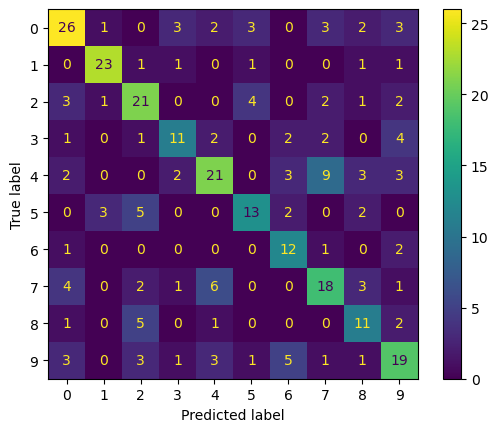

In [28]:
dt_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        dt_preds.argmax(axis=1));
ConfusionMatrixDisplay(dt_cm).plot()

In [29]:
roc_auc_score(y_test,dt_preds)

0.7701313348505953

In [30]:
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    dt_preds,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.77


## Random Forest - Model 2

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [33]:
rf_pred = rf.predict(X_test_scaled)

In [34]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy:', rf_accuracy)
rf_precision = precision_score(y_test, rf_pred, average = 'macro')
print('Precission:',rf_precision)
rf_recall = recall_score(y_test, rf_pred, average = 'macro')
print('Recall:',rf_recall)

Accuracy: 0.4440789473684211
Precission: 0.8608765328874025
Recall: 0.44158895758177563


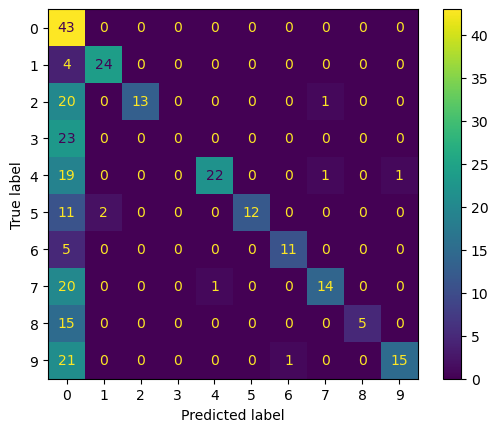

In [35]:
rf_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        rf_pred.argmax(axis=1));
ConfusionMatrixDisplay(rf_cm).plot()

## K-Nearest Neighbor - Model 3

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [37]:
def cross_validation(X_train, y_train, k, num_split = 20):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):


        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        #create/fit the Standard scaler on the train fold
        scaler = StandardScaler()
        X_tf_sc = scaler.fit_transform(X_train_fold)
        # transform validation fold
        X_vld_sc = scaler.transform(X_val_fold)

        # create/fit knearest neighbor
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(X_tf_sc, y_train_fold)
        
        #scores
        accuracy_train = knn.score(X_tf_sc, y_train_fold)
        accuracy_val = knn.score(X_vld_sc, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [38]:
crossval_df = pd.DataFrame(columns = ['k', 'train', 'validation'])

for k in np.arange(1,100):
    crossval_df = crossval_df.append(cross_validation(X_train, y_train, k, 5), ignore_index = True)

In [39]:
crossval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   k           99 non-null     float64
 1   train       99 non-null     float64
 2   validation  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


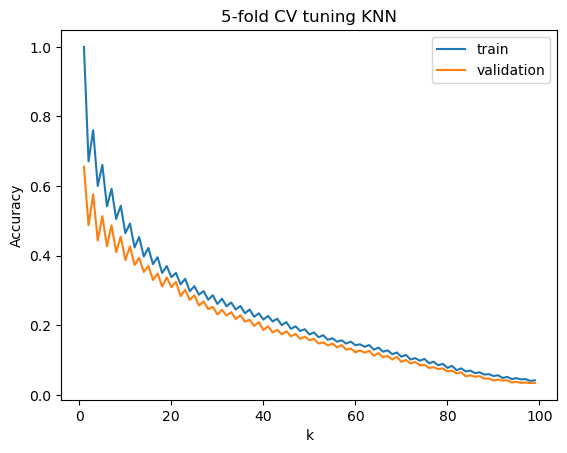

In [40]:
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train', 
             data = crossval_df, 
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation', 
             data = crossval_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning KNN')
plt.show()

In [41]:
crossval_df.iloc[crossval_df['validation'].idxmax()]

k             1.000000
train         1.000000
validation    0.655625
Name: 0, dtype: float64

In [42]:
fulltrain_scaler = StandardScaler()
X_train_sc = fulltrain_scaler.fit_transform(X_train)
X_test_sc = fulltrain_scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

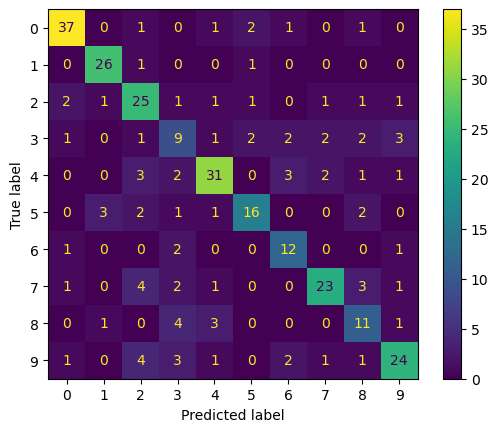

In [43]:
knn_cm =confusion_matrix(y_test.values.argmax(axis=1), 
                        y_pred.argmax(axis=1));
ConfusionMatrixDisplay(knn_cm).plot()

In [44]:
knn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', knn_accuracy)
knn_precision = precision_score(y_test, y_pred, average = 'macro')
print('Precission:',knn_precision)
knn_recall = recall_score(y_test, y_pred, average = 'macro')
print('Recall:',knn_recall)

Accuracy: 0.7039473684210527
Precission: 0.682930706680799
Recall: 0.6882356748673288


In [45]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

In [ ]:
# time series: rnn ; lstms 
melspectrogram - each frame ;